In [148]:
# -*- coding: utf-8 -*-
"""
Created on Fri Mar 26 21:53:30 2021

@author: canis
"""

"""
Btk python ile makine ogrenmesi dersleri 
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

maas= pd.read_csv("maaslar_yeni.csv")
maas

,Calisan ID,unvan,UnvanSeviyesi,Kidem,Puan,maas
0,1,Cayci,1,5,70,2250
1,2,Sekreter,2,5,70,2500
2,3,Uzman Yardimcisi,3,5,70,3000
3,4,Uzman,4,5,70,4000
4,5,Proje Yoneticisi,5,5,70,5500
5,6,Sef,6,5,70,7500
6,7,Mudur,7,5,70,10000
7,8,Direktor,8,5,70,15000
8,9,C-level,9,5,70,25000
9,10,CEO,10,5,70,50000


In [149]:

maas= maas.drop(["Calisan ID"], axis=1)

maas= maas.drop(["unvan"], axis=1)

maas= maas.drop(["UnvanSeviyesi"], axis=1)

maas= maas.drop(["Kidem"], axis=1)

In [150]:
maas

,Puan,maas
0,70,2250
1,70,2500
2,70,3000
3,70,4000
4,70,5500
5,70,7500
6,70,10000
7,70,15000
8,70,25000
9,70,50000


In [151]:
values=maas.iloc[:,0]

In [152]:
values

0     70
1     70
2     70
3     70
4     70
5     70
6     70
7     70
8     70
9     70
10    99
11     9
12    62
13    38
14    80
15    35
16    99
17    58
18    20
19    42
20    11
21    53
22    50
23    91
24    71
25     2
26    81
27    38
28    50
29    83
Name: Puan, dtype: int64

In [153]:
maas= maas.iloc[:,1:]

In [154]:
maas

,maas
0,2250
1,2500
2,3000
3,4000
4,5500
5,7500
6,10000
7,15000
8,25000
9,50000


In [155]:
#Linear Regression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [156]:

lr= LinearRegression()


In [157]:
type(maas)


pandas.core.frame.DataFrame

In [158]:
type(values)

pandas.core.series.Series

In [159]:
values= pd.DataFrame(values)

In [160]:
x_train, x_test, y_train, y_test = train_test_split(values, maas, test_size=0.33, random_state=0)

In [161]:
lr.fit(x_train, y_train)
pred= lr.predict(x_test)

In [162]:
pred= pd.DataFrame(pred, columns=["maas tahmin"])
pred

,maas tahmin
0,14305.414287
1,11497.259523
2,9812.366665
3,18377.238694
4,15849.899407
5,14445.822025
6,9812.366665
7,5740.542257
8,12620.521428
9,11497.259523


In [163]:
y_test

,maas
2,3000
28,15000
13,3000
10,2000
26,12000
24,5400
27,10000
11,2500
17,11000
22,2800


Linear Regression R2 score:  -2.0431364402159584


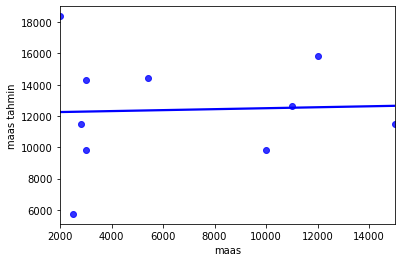

In [164]:

import seaborn as sbn
sbn. regplot(x=y_test, y= pred, ci=None, color="b")

#R2 score for Linear Regression
from sklearn.metrics import r2_score
print("Linear Regression R2 score: ",r2_score(y_test, pred))

In [165]:

from  sklearn.preprocessing import PolynomialFeatures

polynomial= PolynomialFeatures(degree= 3)

xp_train=polynomial.fit_transform(x_train)
xp_test= polynomial.fit_transform(x_test)

regressor= LinearRegression()

regressor.fit(xp_train, y_train)
xppred= regressor.predict(xp_test)
polynomial_r2score= regressor.score(xp_test,y_test)

print("Polynomial Regression R2 score: ",polynomial_r2score)

Polynomial Regression R2 score:  -1.8674286350053237


In [166]:

from sklearn.preprocessing import StandardScaler


xsvm_train, xsvm_test, ysvm_train, ysvm_test= train_test_split(values, maas, test_size= 0.33, random_state=10)


In [167]:

from sklearn import svm

clf = svm.SVC(kernel='rbf')

clf.fit(xsvm_train, ysvm_train)


C:\Users\canis\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC()

In [168]:
xsvm_train

,Puan
19,42
14,80
18,20
6,70
11,9
23,91
24,71
28,50
22,50
10,99


In [169]:
ysvm_train

,maas
19,22000
14,5000
18,15000
6,10000
11,2500
23,6000
24,5400
28,15000
22,2800
10,2000


In [170]:
predsvm= clf.predict